# Global Power Plant Database

## Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


## Key attributes of the database
The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


## Problem Definition

We define the "Fuel Type" attribute of our database based on common fuel categories. i.e. Fuel Type Aggregation
And have to Build 2 Models based on:

Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df_pp=pd.read_csv("power_plant.csv")
df_pp.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


## Starting the EDA

In [3]:
# Checking Configuration of Dataset
df_pp.shape

(907, 27)

Obs-
* We can see the dataset contains 907 entries of India Country only
* There are 27 columns of which 26 are input, and the output will be either Primary_Fuel(For Classification Model), and Capacity_mw(For Regression Model)

In [4]:
# Checking data types of attributes
df_pp.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Obs- We can see there are both continuous and categorical columns in the dataset, the target field 1)primary_fuel is categorical type and 2) capacity_mw is continuous type.

* will encode the categorical column later

In [5]:
# Checking for null values if any
df_pp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

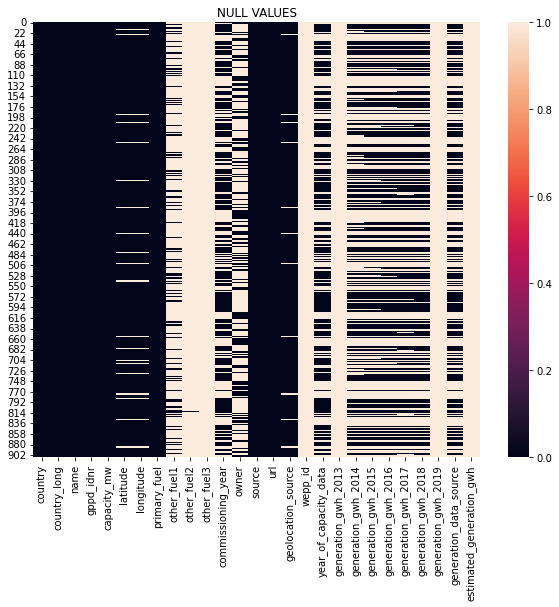

In [6]:
# Visualization of null values
plt.figure(figsize=[10,8])
sns.heatmap(df_pp.isnull())
plt.title("NULL VALUES")
plt.show()

Obs- We can see the columns contain large number of null values.

* Will be deleting the columns: 'other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh' as  all of these columns have no data in them(except for 'other_fuel2' that has just 1 entry)

* We will also delete the columns: 'other_fuel1','owner','url' as either they have insufficient data or are not useful for Model Prediction at all

In [7]:
# Checking for white spaces
df_pp.loc[0:]==" "

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
903,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Obs- There is no white space in the data

In [8]:
#Check for duplicate data
df_pp.duplicated().sum()

0

Obs- There is no duplicate data in the dataset

In [9]:
df_pp.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Obs- 
* We can see columns:'country','country_long','year_of_capacity_data','generation_data_source' contains only a single entity for all rows, so we will be deleting these columns too.
* Also we can see columns: 'name','gppd_idnr' contains all distinct values and doesnot comply in predicting target , so will be deleting these two columns as well.

## Feature Engineering

### Deleting the Unwanted Columns

### a. Deleting all blank entry columns

In [10]:
df_pp.drop(columns=['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [11]:
df_pp.shape

(907, 21)

### b. Deleting Unwanted/ Insufficient-Data columns

In [12]:
df_pp.drop(columns=['other_fuel1','owner','url'],axis=1,inplace=True)

In [13]:
df_pp.shape

(907, 18)

### c. Deleting Single Entry Columns 

In [14]:
df_pp.drop(columns=['country','country_long','year_of_capacity_data','generation_data_source'],axis=1,inplace=True)

In [15]:
df_pp.shape

(907, 14)

### d. Deleting all Distinct value Columns

In [16]:
df_pp.drop(columns=['name','gppd_idnr'],axis=1,inplace=True)

In [17]:
df_pp.shape

(907, 12)

### Conc- We have now obtained a almost(as it stiill have NaN values) clean dataset on which we can continue our EDA

In [18]:
# Viewing the Dataset
df_pp

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [19]:
# Checking null value once again
df_pp.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

## Filling the Missing Values

## a. Filling the continous column with the mean.

In [20]:
df_pp=df_pp.fillna(df_pp.mean())

In [21]:
# check for any null values
df_pp.isnull().sum()

capacity_mw             0
latitude                0
longitude               0
primary_fuel            0
commissioning_year      0
source                  0
geolocation_source     19
generation_gwh_2014     0
generation_gwh_2015     0
generation_gwh_2016     0
generation_gwh_2017     0
generation_gwh_2018     0
dtype: int64

## b. Filling the remaining Column with mode

In [22]:
# value counts of geolocation source
df_pp['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

Obs- We can see 'WRI' is the most frequently occuring entry in the geolocation_source column, thus filling the missing values with "WRI"

In [23]:
df_pp['geolocation_source']=df_pp['geolocation_source'].fillna("WRI")

In [24]:
# checking for null values
df_pp.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Obs- The data is all clean now, as none of the columns have any missing value now

In [25]:
#Checking description of dataset
df_pp.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


<AxesSubplot:>

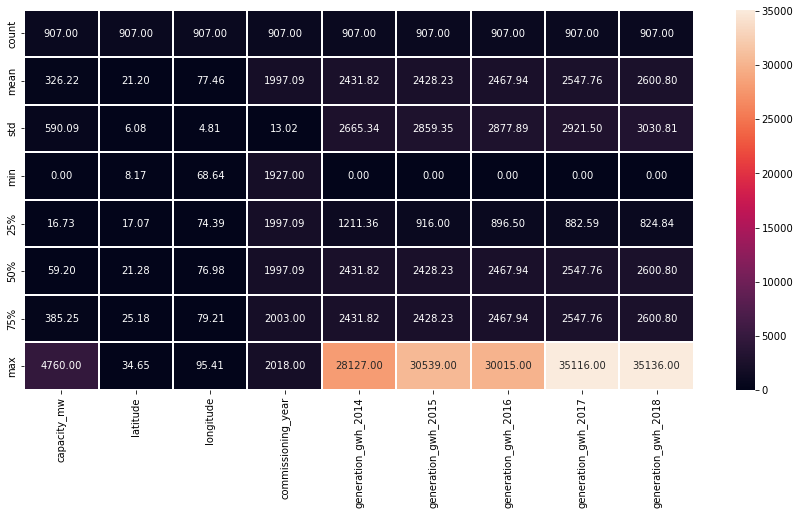

In [26]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(15,7))
sns.heatmap(df_pp.describe(),linewidths = 0.1,fmt='0.2f',annot = True)

Obs- 
* The mean in columns 'capacity_mw','longitude' is greater tham median and thus we can say right skewness is present in these columns.
* The mean in column 'latitude' is lower than median, and thus we can say left skewness is present in these columns
* The mean and median of other columns are equal, and thus we can say they are normally distributed.
* The max of all the columns is exceptionally high than median, and thus we can say outliers are present in all the columns
    

In [27]:
 #'capacity_mw','latitude','longitude','commisioning_year','generation_gwh_2014',

## Visualization

### Univariate Analysis

In [28]:
df_pp.nunique()

capacity_mw            361
latitude               837
longitude              828
primary_fuel             8
commissioning_year      74
source                 191
geolocation_source       3
generation_gwh_2014    372
generation_gwh_2015    397
generation_gwh_2016    404
generation_gwh_2017    409
generation_gwh_2018    411
dtype: int64

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

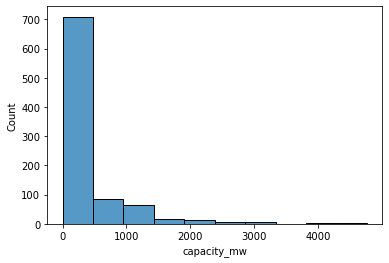

In [29]:
# Histogram to check capacities of various power plants
sns.histplot(data=df_pp['capacity_mw'],bins=10)

Obs- We can see nearly 700 power plants generate capacity in range of 0-500 mw, a roughly 100 power plants generate capacity in range 500-100 mw and there are  very few that produce capacity greater than 2000 and as high as 4000

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

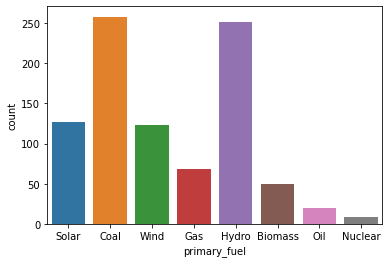

In [30]:
# Count plot to check individual value counts of type of Primary Fuel
print(df_pp['primary_fuel'].value_counts())

sns.countplot(df_pp['primary_fuel'])

Obs- There are a total of 8 types of Primary_Fuel, of which Coal is used by maximum power plants for electricity generation, followed by Hydro, Solar and least used id Nuclear

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

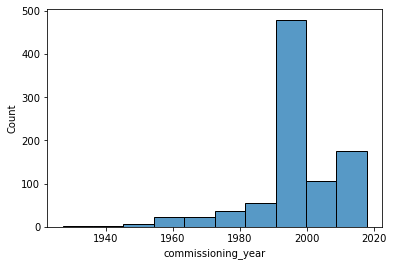

In [31]:
# Histogram to check power plants commencing years count
sns.histplot(data=df_pp['commissioning_year'],bins=10)

Obs- We can see a huge number of Power plants were commenced in years from 1990-2000(nearly 500), the next highest was from 2010-2020 where nearly 200 power plants were installed

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


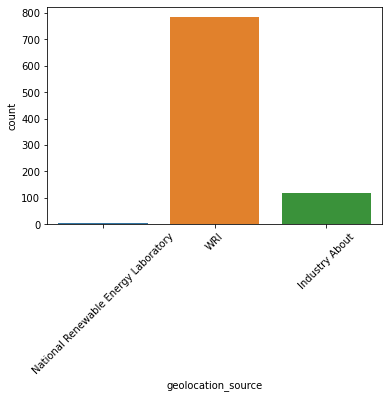

In [32]:
# Count plot to check individual value counts of geolocation_source
print(df_pp['geolocation_source'].value_counts())

sns.countplot(df_pp['geolocation_source'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see the Geo-location source selected for most of the power plants is 'WRI', followed by 'Insustry About' and a very few of them have the source as 'National Renewable Energy Laboratory'

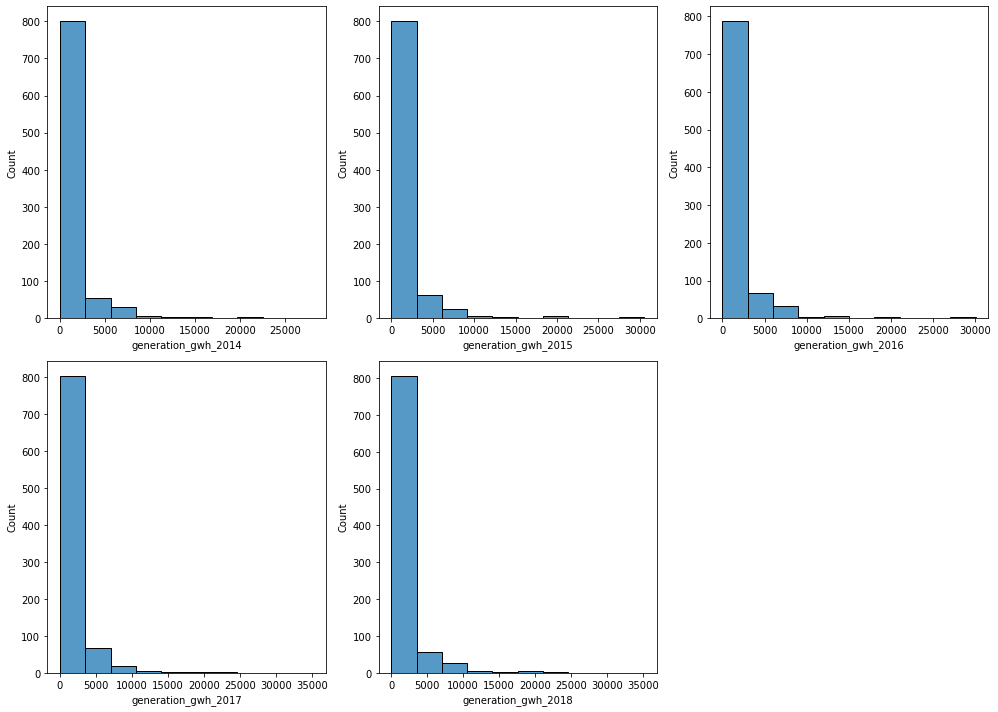

In [33]:
# Histogram to check electricity generation units in megawatt-hertz in years 2014-2018
plt.figure(figsize=(14,10),facecolor='white')
plotnum=1
gcols=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for col in gcols:
    if plotnum<=6:
        plt.subplot(2,3,plotnum)
        sns.histplot(data=df_pp[col],bins=10)
    plotnum+=1
plt.tight_layout()

Obs- 
* A similar trend of generating electricity in range of 2500 gwh is seen in all years by around 800 power plants.
* The max units in year 2014 is nearly equal to 20000 gwh. The max units in year 2015 is nearly 30000 gwh, for year 2016 its is 30000 gwh, for year 2017 its is nearly 25000 gwh and for year 2018 it is again nearly 25000 mwh

In [34]:
# Distribution plot to check skewness in the features

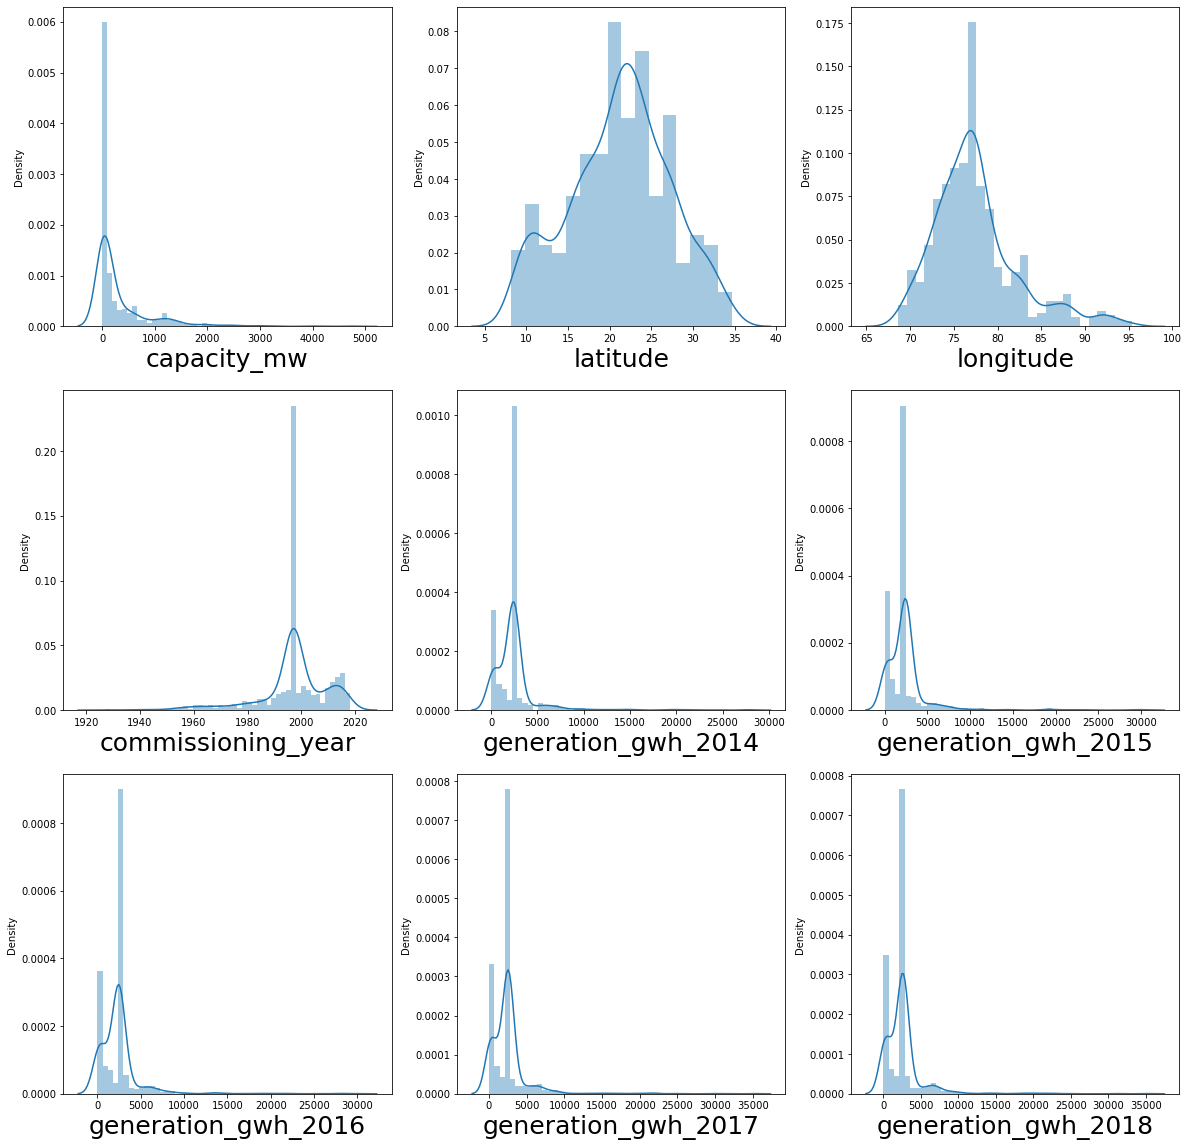

In [35]:
plt.figure(figsize=(20,20))
plotnumber=1

col=['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
     
for column in col:
    if plotnumber<=9: #as there are 9 continuous columns 
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_pp[column])
        plt.xlabel(column,fontsize=25)
    plotnumber +=1
plt.show()

Obs- We can see right skewness in columns: 'capacity_mw','longitude'. Left skewness in column 'latitude' and almost normal distribution in all other columns
    

In [36]:
#box plot to check outliers

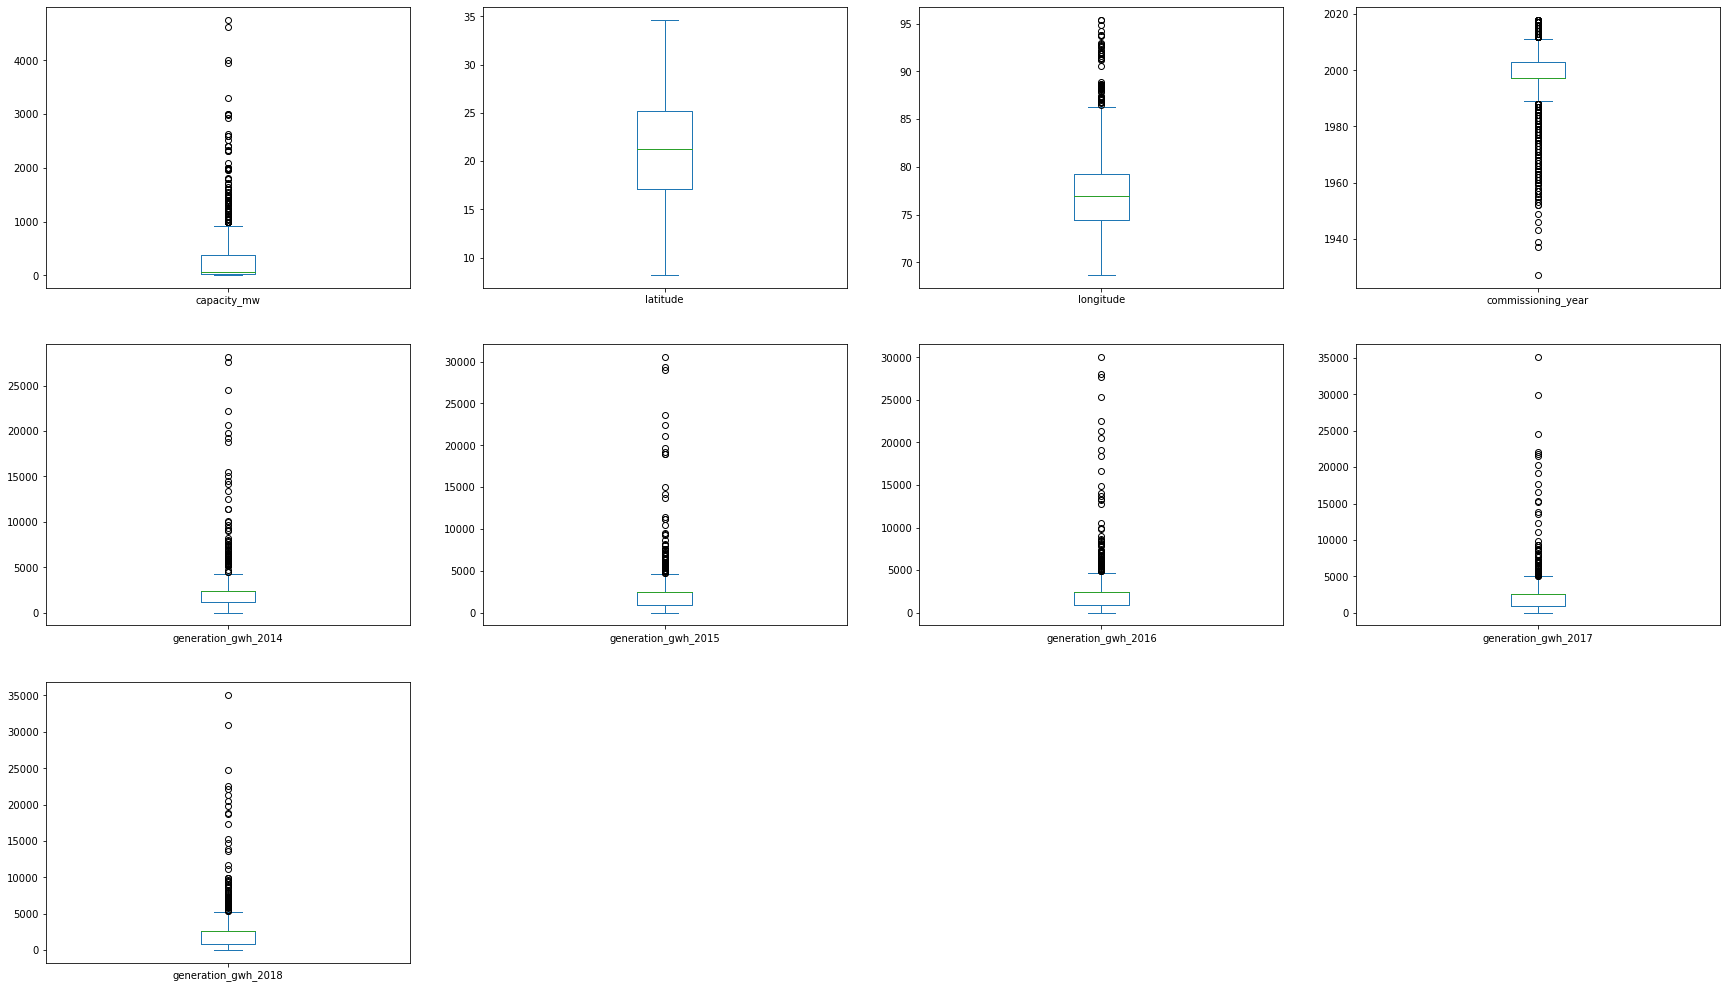

In [37]:
df_pp.plot(kind='box',subplots=True,layout=(5,4),figsize=(30,30))
plt.show()

Obs- We can see a great number of outliers are present in all columns

### Bivariate and Multivariate Visualization

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

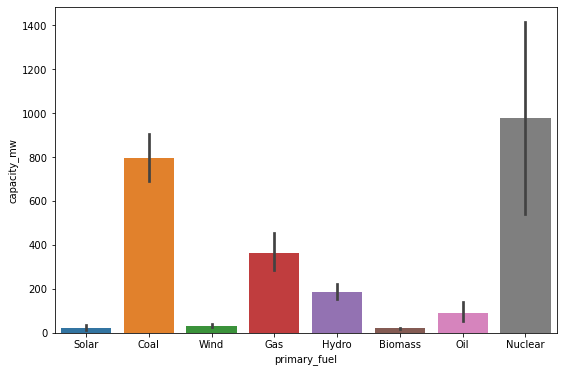

In [38]:
# Bar plot to check capacity_mw generated by different primary_fuels
plt.figure(figsize=(9,6))
sns.barplot(x="primary_fuel", data=df_pp,y='capacity_mw')

Obs- We can see max capacity in mw generated by power plants that use primary_fuel as 'Nuclear', next higher capcity is generated by those that use 'coal', followed by 'Gas','Hydro','Oil','Wind','Solar' 

The least capacity is generated by those that use primary fuel as 'Biomass'

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

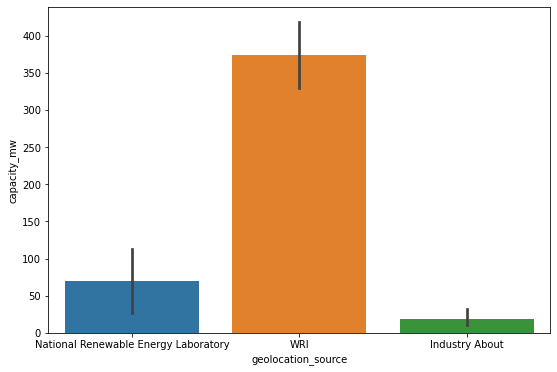

In [39]:
# Bar plot to check capacity_mw generated by power plants of different geolocation_source
plt.figure(figsize=(9,6))
sns.barplot(x="geolocation_source", data=df_pp,y='capacity_mw')

Obs- We can see 'WRI' geolocation_source since have high numbers, helps in generating maximum capacity_mw, i.e more than 350 mw, while power plants at 'National Renewable Energy Laboratory'  genertes around 75 mw and the least is produced by power plants at 'Industry About' which produce capacity even less than 25 mw 

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

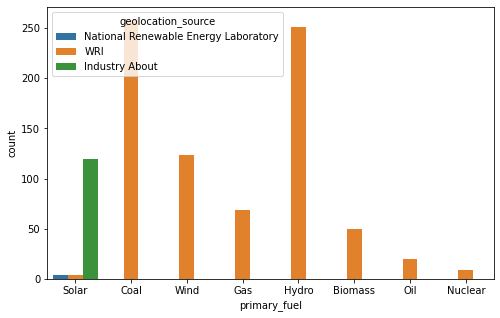

In [40]:
# Count plot to check in which geolocation source, what primary fuel is used
plt.figure(figsize=(8,5))
sns.countplot(x="primary_fuel", data=df_pp,hue='geolocation_source')

Obs- We can see that power plant that use Solar as their primary fuel have their geo-location source as 'Industry About','WRI'and 'National Renewable Energy Laboratory', while all others that use other primary_fuels have 'WRI' as their geolaocation

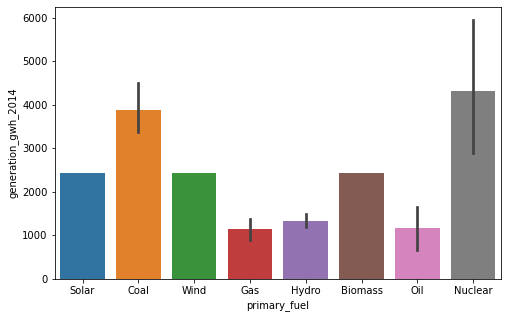

In [41]:
# Bar plot to check gigawatt-hertz generated by various primary fuels in year 2014
plt.figure(figsize=(8,5))
sns.barplot(x="primary_fuel", data=df_pp,y='generation_gwh_2014')
plt.show()

Obs- We can see the power plants that use primary_fuel as 'Nuclear' produce higher units of gwh. Next higher gwh is generated by those that use 'coal'. followed by 'Solar','Wind','Biomass','Hydro','Oil' and least by 'Gas '

The similar pattern is observed for all the other years, so not including their charts

## Encoding Categorical Data

In [42]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_pp['primary_fuel']=le.fit_transform(df_pp['primary_fuel'])
df_pp['source']=le.fit_transform(df_pp['source'])
df_pp['geolocation_source']=le.fit_transform(df_pp['geolocation_source'])
df_pp.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


Obs- We can see all the categorical columns are been encoded by integers

## Checking Correlation

In [43]:
df_pp.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.274292,-2.421218e-01,2.048653e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,0.050984,1.000000,0.036362,-0.010204,0.102069,5.592656e-02,-1.842751e-01,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,0.195882,0.036362,1.000000,-0.347948,0.092331,-2.393334e-01,2.523426e-01,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.126650,5.361263e-02,-4.832168e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
commissioning_year,0.274292,0.102069,0.092331,-0.126650,1.000000,2.152776e-02,-7.843657e-03,1.330505e-01,1.473376e-01,1.706440e-01,1.708631e-01,1.743766e-01
source,-0.242122,0.055927,-0.239333,0.053613,0.021528,1.000000e+00,-5.057202e-01,1.917854e-18,-2.160931e-17,-4.925637e-17,-1.284552e-16,1.092118e-17
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.007844,-5.057202e-01,1.000000e+00,-2.966463e-17,-6.339264e-18,2.904016e-17,8.066490e-17,-1.048582e-17
generation_gwh_2014,0.694350,0.044321,0.011472,-0.124769,0.133051,1.917854e-18,-2.966463e-17,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01
generation_gwh_2015,0.711190,0.036398,0.018818,-0.124828,0.147338,-2.160931e-17,-6.339264e-18,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01
generation_gwh_2016,0.742221,0.031256,0.039209,-0.131051,0.170644,-4.925637e-17,2.904016e-17,9.258738e-01,9.688877e-01,1.000000e+00,9.646488e-01,9.571589e-01


<AxesSubplot:>

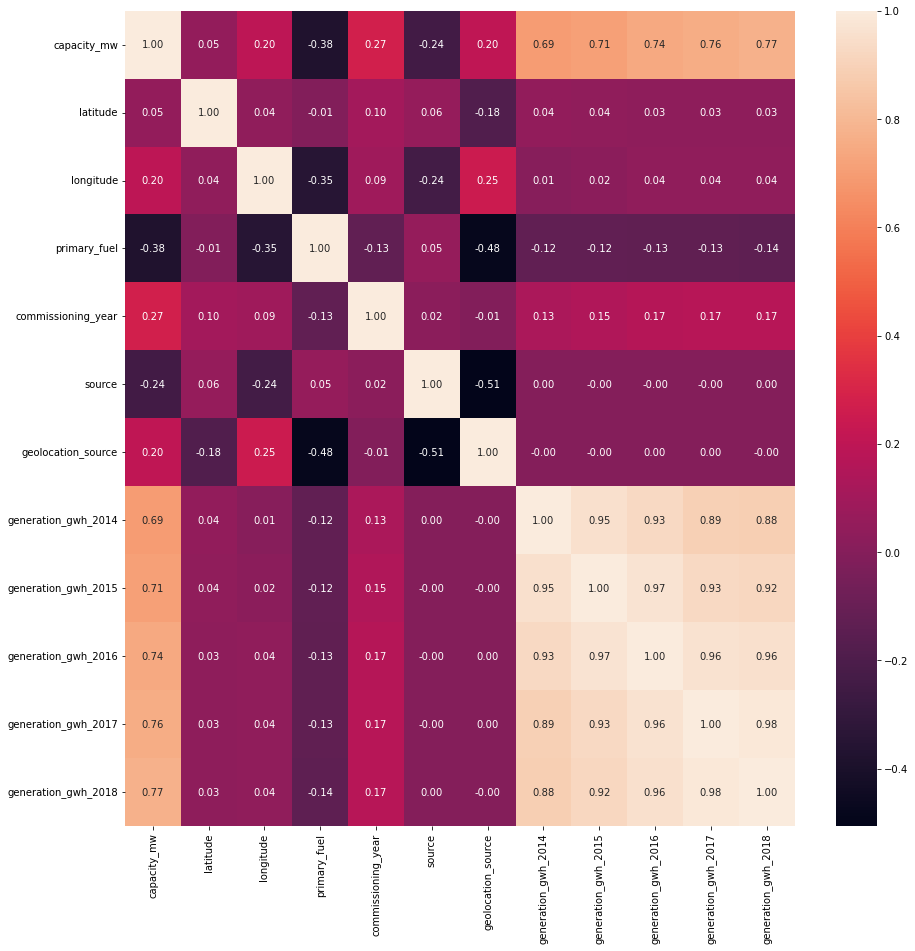

In [44]:
# Correlation using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df_pp.corr(),annot=True,fmt='0.2f')

Obs-We can see,

* highly positive correlated columns(>0.7):('capacity_mw'and 'generation_gwh_2015-2018'),('generation_gwh_2014' and all other 4 years of data)
* positive correlated columns(>0.4):('capacity_mw'and 'generation_gwh_2014')
* highly negative correlated columns(>-0.4):('primary_fuel' and 'geolocation_source'),('source' and 'geolocation_source')
* negative correlated columns(>-0.2):('capacity_mw'and 'primary_fuel'),('capacity_mw'and 'source'),('longitude' and 'primary_fuel),('longitude' and 'source'),('source' and 'geolocation_source')

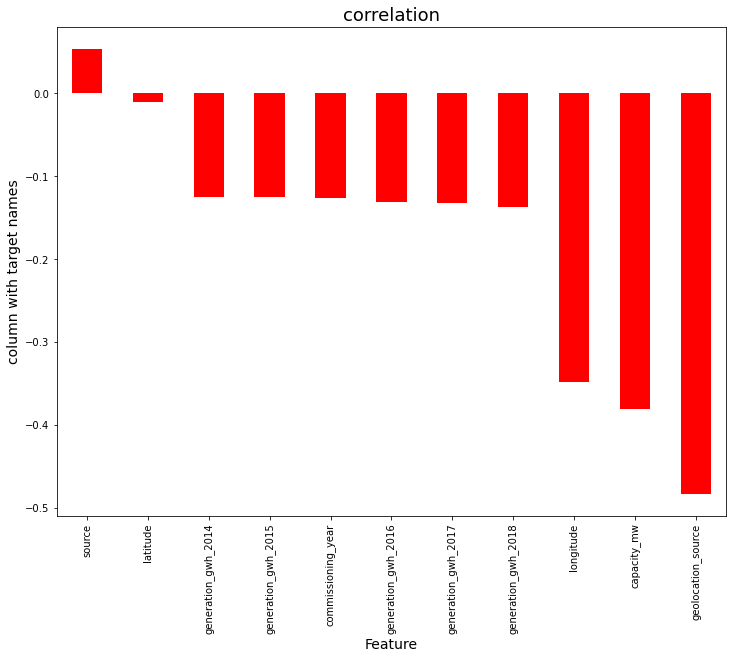

In [45]:
# Correlation of features with Target Column 1(primary_fuel)
plt.figure(figsize=(12,9))
df_pp.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Obs- We can see that except for 'source' column, all other features are negatively correlated with 'Primary_fuel'

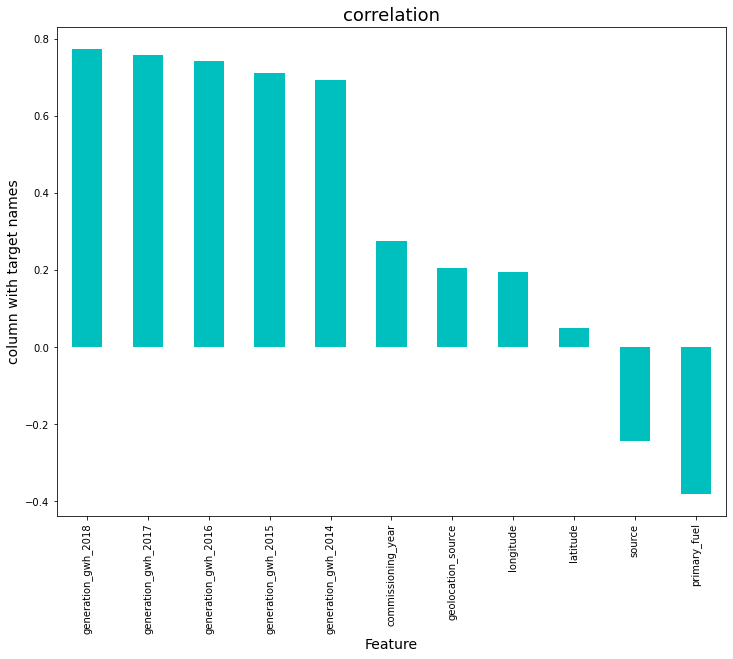

In [46]:
# Correlation of features with Target Column 2(capacity_mw)
plt.figure(figsize=(12,9))
df_pp.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Obs- We can see except for 'source' and 'primary_fuel' all other columns are positively correlated with 'capacity_mw'

## Detecting Outliers and Treating them

In [47]:
#Method 1: Z-Score
from scipy.stats import zscore
z=np.abs(zscore(df_pp))
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
       299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
       360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
       454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494,
       494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601,
       621, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
       657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709, 721,
       721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
       726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808,
       808, 808, 808, 808, 818, 832, 847, 848, 870, 871, 879, 880, 880,
       880, 880, 880, 880, 895, 900], dtype=int64), array([ 0,  8,  9, 10, 11,  5,  5,  0,  7,  8,  9, 10, 11,  0,  7,  2,  2,
        5,  0,  7,  8,  9, 10, 11,  4,  2,  5,  0,  7,  8,  9, 10, 11,  5,
     

In [48]:
df_pp_new=df_pp[(z<3).all(axis=1)]

In [49]:
print("df_pp.shape:",df_pp.shape, "\ndf_pp_new.shape:",df_pp_new.shape)

df_pp.shape: (907, 12) 
df_pp_new.shape: (834, 12)


In [50]:
# Checking data loss
data_loss=(907-834)/907*100
data_loss

8.04851157662624

In [51]:
# Method 2: IQR(Inter Quartile) Method
Q1=df_pp.quantile(0.25)
Q3=df_pp.quantile(0.75)
IQR=Q3 - Q1

df_pp_new2=df_pp[~((df_pp < (Q1 - 1.5 * IQR)) |(df_pp > (Q3 + 1.5 * IQR))).any(axis=1)]

In [52]:
print("df_pp.shape:",df_pp.shape, "\ndf_pp_new2.shape:",df_pp_new2.shape)

df_pp.shape: (907, 12) 
df_pp_new2.shape: (321, 12)


In [53]:
# Checking data loss
data_loss2=(907-321)/907*100
data_loss2

64.60859977949283

The data loss in IQR is huge, so will be going with z-score method

In [54]:
# Reassigning obtained value to original dataframe
df_pp=df_pp_new
df_pp.shape

(834, 12)

In [55]:
df_pp.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

## (Approach 1: 'Classification Model to find "fuel_type")

## Data Preprocessing

## Seperating Input and Target variables

In [56]:
x=df_pp.drop(columns='primary_fuel')
y=df_pp['primary_fuel']

In [57]:
x.shape

(834, 11)

In [58]:
y.shape

(834,)

## Data Transformation to treat Skewness

### Checking Skewness

In [59]:
x.skew()

capacity_mw            1.952694
latitude              -0.111185
longitude              0.911122
commissioning_year    -0.842130
source                 1.784584
geolocation_source    -2.104209
generation_gwh_2014    1.523244
generation_gwh_2015    1.388578
generation_gwh_2016    1.411295
generation_gwh_2017    1.278075
generation_gwh_2018    1.315105
dtype: float64

Obs- We can see except for column 'latitude', skewness is present in all the columns.

Applying transformation method to treat skewness

### Applying Transformation Method

In [60]:
x=pd.DataFrame(x)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['capacity_mw', 'longitude', 'commissioning_year', 'source', 'geolocation_source','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017', 'generation_gwh_2018']
x[skew_col]= pt.fit_transform(x[skew_col].values)

In [61]:
x.skew()

capacity_mw            0.011603
latitude              -0.111185
longitude             -0.000409
commissioning_year     0.027512
source                -0.179189
geolocation_source    -2.076068
generation_gwh_2014   -0.249970
generation_gwh_2015   -0.313081
generation_gwh_2016   -0.312658
generation_gwh_2017   -0.343453
generation_gwh_2018   -0.356856
dtype: float64

Obs-
* We can see skewness is removed from all, except 'geolocation_source' column.
* We tried applying other transformation techniques- 

    1.BoxCox(Which didn't work as the transformed data has negatives),                                                    
 2. Sqrt Transformation(It yielded in creating NaN values im the data), 
* and therefore continuing with the current obtained results only

## Data Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale=pd.DataFrame(x_scale)

In [63]:
x=pd.DataFrame(data=x_scale)

## Checking Multi-Collinearity

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
def vif_cal():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

vif_cal()

    VIF Factor  Features
0     1.588529         0
1     1.085040         1
2     1.220877         2
3     1.177224         3
4     1.246220         4
5     1.573940         5
6     4.174521         6
7     7.984716         7
8    11.847992         8
9    11.525459         9
10   12.269961        10


Obs- 
* (Feature Denoted as: 0: 'capacity_mw' 1:'latitude', 2:'longitude', 3:'commissioning_year' , 4:'source', 5:'geolocation_source', 6:'generation_gwh_2014', 7:'generation_gwh_2015', 8: 'generation_gwh_2016',9:'generation_gwh_2017',10: 'generation_gwh_2018')

* Keeping the acceptable range as below or equal 10, we observe the VIF of 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018' is high (we did see there correlation was also high)
* Deleting the column 'generation_gwh_2018' as it has max VIF

In [66]:
x.drop(10, axis =1, inplace=True) # Dropping 'generation_gwh_2018' column

In [67]:
x.shape

(834, 10)

In [68]:
# Rechecking the VIF
vif_cal()

   VIF Factor  Features
0    1.587235         0
1    1.085002         1
2    1.220162         2
3    1.176472         3
4    1.245848         4
5    1.573758         5
6    4.138558         6
7    7.967734         7
8   10.959415         8
9    5.556513         9


Obs- Again we can see VIF of column 8: 'generation_gwh_2016' is high, so dropping this column as well

In [69]:
x.drop(8, axis =1, inplace=True) # Dropping 'generation_gwh_2016' column

In [70]:
x.shape

(834, 9)

## Data Modelling(Classification Model)

In [ ]:
#Finding Best Random State

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train, y_train)
    predc = dtc.predict(x_test)
    acc=accuracy_score(y_test, predc)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8708133971291866  on Random_state  48


## Splitting data into Train-Test

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=48)

In [89]:
x_train.shape

(625, 9)

In [90]:
y_train.shape

(625,)

In [91]:
x_test.shape

(209, 9)

In [92]:
y_test.shape

(209,)

## Using various Machine Learning Algorithms

In [93]:
#importing necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1. MultinomialNB
(Didn't work on it as scaled values were having some negative values)

### 2.Decision Tree Classifier

In [96]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.8660287081339713
Confusion Matrix:
 [[ 7  2  0  0  0  1  0  0]
 [ 0 44  5  2  0  1  0  0]
 [ 0  3  6  2  1  1  0  0]
 [ 0  3  1 57  0  1  0  0]
 [ 0  1  0  1  1  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.81      0.85      0.83        52
           2       0.43      0.46      0.44        13
           3       0.92      0.92      0.92        62
           4       0.50      0.33      0.40         3
           5       0.33      0.40      0.36         5
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        32

    accuracy                           0.87       209
   macro avg       0.75      0.71      0.72       209
weighted avg       0.87      0.87      0.87       209



Obs- The Decision Tree Classifier has provided the accuracy-score: 0.8660287081339713

### 3.K Nearest Neighbor Classifier

In [97]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.7607655502392344
Confusion Matrix:
 [[ 8  2  0  0  0  0  0  0]
 [ 1 46  4  1  0  0  0  0]
 [ 0  3  3  5  0  0  0  2]
 [ 0 10  4 40  0  0  0  8]
 [ 0  2  0  0  0  0  0  1]
 [ 0  0  2  3  0  0  0  0]
 [ 0  1  0  0  0  0 31  0]
 [ 0  0  0  1  0  0  0 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.72      0.88      0.79        52
           2       0.23      0.23      0.23        13
           3       0.80      0.65      0.71        62
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.98        32
           7       0.74      0.97      0.84        32

    accuracy                           0.76       209
   macro avg       0.55      0.56      0.55       209
weighted avg       0.74      0.76      0.74       209



Obs- The K Nearest Neighbor Classifier has provided the accuracy-score:  0.7607655502392344

### 5.Support Vector Machine Classifier

In [98]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.7559808612440191
Confusion Matrix:
 [[ 5  3  0  0  0  0  0  2]
 [ 1 47  2  2  0  0  0  0]
 [ 1  3  3  4  0  0  0  2]
 [ 0 11  1 41  0  0  0  9]
 [ 0  3  0  0  0  0  0  0]
 [ 2  0  0  3  0  0  0  0]
 [ 0  2  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.68      0.90      0.78        52
           2       0.50      0.23      0.32        13
           3       0.82      0.66      0.73        62
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      0.94      0.97        32
           7       0.71      1.00      0.83        32

    accuracy                           0.76       209
   macro avg       0.53      0.53      0.52       209
weighted avg       0.73      0.76      0.73       209



Obs- The Support Vector Machine Classifier has provided the accuracy-score:0.7559808612440191

### 5. Ensemble Methods

#### 5.1 Random Forest Classifier

In [99]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.8516746411483254
Confusion Matrix:
 [[ 7  3  0  0  0  0  0  0]
 [ 0 48  3  1  0  0  0  0]
 [ 0  4  5  4  0  0  0  0]
 [ 0  8  2 52  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  3  0  0  2  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.73      0.92      0.81        52
           2       0.38      0.38      0.38        13
           3       0.91      0.84      0.87        62
           4       0.00      0.00      0.00         3
           5       1.00      0.40      0.57         5
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        32

    accuracy                           0.85       209
   macro avg       0.75      0.66      0.68       209
weighted avg       0.85      0.85      0.84       209



Obs- The Random Forest Classifier has provided the accuracy-score:0.8516746411483254

#### 5.2 Ada Boost Classifier

In [100]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.6602870813397129
Confusion Matrix:
 [[ 0 10  0  0  0  0  0  0]
 [ 0 14  0 37  0  0  0  1]
 [ 0  1  0 11  0  0  0  1]
 [ 0  0  0 62  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]
 [ 0  2  0  3  0  0  0  0]
 [ 0  2  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.47      0.27      0.34        52
           2       0.00      0.00      0.00        13
           3       0.54      1.00      0.70        62
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      0.94      0.97        32
           7       0.94      1.00      0.97        32

    accuracy                           0.66       209
   macro avg       0.37      0.40      0.37       209
weighted avg       0.57      0.66      0.59       209



Obs- The Ada Boost Classifier has provided the accuracy-score: 0.6602870813397129

#### 5.3 Gradient Boosting Classifier

In [101]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.8564593301435407
Confusion Matrix:
 [[ 7  3  0  0  0  0  0  0]
 [ 0 44  5  1  2  0  0  0]
 [ 0  3  7  2  0  1  0  0]
 [ 0  6  2 54  0  0  0  0]
 [ 0  2  0  0  1  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.75      0.85      0.79        52
           2       0.44      0.54      0.48        13
           3       0.95      0.87      0.91        62
           4       0.33      0.33      0.33         3
           5       0.67      0.40      0.50         5
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        32

    accuracy                           0.86       209
   macro avg       0.77      0.71      0.73       209
weighted avg       0.87      0.86      0.86       209



Obs- The Gradient Boosting Classifier has provided the accuracy-score:0.8564593301435407

## Cross Validation

In [106]:
# Using of K-Fold cross-validation technique

preddtc= dtc.predict(x_test)

from sklearn.model_selection import cross_val_score

test_accuracy= accuracy_score(y_test,preddtc)

for j in range(4,11):
    cv_score=cross_val_score(dtc,x,y,cv=j)
    cv_mean= cv_score.mean()
    print('At cv:',j)
    print('Cross_Validation_score is:',cv_mean*100)
    print('Accuracy is :',test_accuracy*100)
    print("\n")

At cv: 4
Cross_Validation_score is: 81.05562200956938
Accuracy is : 86.60287081339713


At cv: 5
Cross_Validation_score is: 79.25474352499819
Accuracy is : 86.60287081339713


At cv: 6
Cross_Validation_score is: 80.93525179856117
Accuracy is : 86.60287081339713


At cv: 7
Cross_Validation_score is: 80.45618247298918
Accuracy is : 86.60287081339713


At cv: 8
Cross_Validation_score is: 80.4544413919414
Accuracy is : 86.60287081339713


At cv: 9
Cross_Validation_score is: 81.88925250636329
Accuracy is : 86.60287081339713


At cv: 10
Cross_Validation_score is: 81.41422834193918
Accuracy is : 86.60287081339713




Obs- Selecting the fold value as 4

In [107]:
# cv score for Decision Tree Classifier 
cvdtc=cross_val_score(dtc,x,y,cv=4).mean()
print('CV score  for Decision Tree Classifier:',cvdtc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddtc)-cvdtc)

CV score  for Decision Tree Classifier: 0.810538967611336
And Difference between CV and accuracy_score= 0.05548974052263522


In [108]:
# cv score for K Neighbors Classifier 
cvknn=cross_val_score(knn,x,y,cv=4).mean()
print('CV score  for K Neighbors Clssifier:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score  for K Neighbors Clssifier: 0.7817445712182555
And Difference between CV and accuracy_score= -0.020979020979021046


In [109]:
# cv score for Support Vector Machine Classifier 
cvsvc=cross_val_score(svc,x,y,cv=4).mean()
print('CV score  for Support Vector Classifier:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score  for Support Vector Classifier: 0.7577923721015827
And Difference between CV and accuracy_score= -0.0018115108575635919


In [110]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=4).mean()
print('CV score  for RandomForestClassifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score  for RandomForestClassifier: 0.8597142988590357
And Difference between CV and accuracy_score= -0.008039657710710357


In [111]:
# cv score for Ada Boost Classifier
cvad=cross_val_score(ad,x,y,cv=4).mean()
print('CV score  for Ada Boost Classifier:',cvad)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predad)-cvad)

CV score  for Ada Boost Classifier: 0.4891136823702613
And Difference between CV and accuracy_score= 0.1711733989694516


Obs-
* From the observation of accuracy and cross validation score and their difference we can predict that Support Vector Classifier is  the best model from Model1

## Hyper Parameter Tuning

In [112]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [113]:
#Selecting few parameter list to pass in Support Vector Classifier
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'C': [1.0, 2.0, 3.0],
             'gamma': ['scale', 'auto'],
             'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'random_state':[0,15,42,55,73]}

In [115]:
# Start Tuning 
svc1=SVC()
GCV = GridSearchCV(svc1,parameter,cv=4)

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv

{'C': 3.0, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}


In [118]:
#Applying best parameter values on Support Vector Classifier Algorithm 
fuel_best=SVC(C= 3.0, gamma= 'scale', kernel= 'rbf', random_state=0)
fuel_best.fit(x_train,y_train)
predsvc1=fuel_best.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc1))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc1))
print("Classification Report:\n",classification_report(y_test,predsvc1))

Accuracy: 0.784688995215311
Confusion Matrix:
 [[ 6  3  0  0  0  0  0  1]
 [ 1 48  2  1  0  0  0  0]
 [ 1  3  5  2  0  0  0  2]
 [ 0 11  3 41  0  0  0  7]
 [ 0  3  0  0  0  0  0  0]
 [ 2  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.71      0.92      0.80        52
           2       0.50      0.38      0.43        13
           3       0.87      0.66      0.75        62
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        32
           7       0.76      1.00      0.86        32

    accuracy                           0.78       209
   macro avg       0.56      0.57      0.56       209
weighted avg       0.76      0.78      0.76       209



Obs- Our best model for fuel_type has given accuracy_score:0.784688995215311

## Saving the best model

In [119]:
import joblib

joblib.dump(fuel_best,'fuel.obj')

['fuel.obj']

In [120]:
fuel_model=joblib.load('fuel.obj')

In [121]:
# Viewing Attributes of the best model
fuel_model

SVC(C=3.0, random_state=0)

## Prediction

In [122]:
ori = np.array(y_test)
predicted = np.array(fuel_model.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new

,Original,Predicted
0,3,7
1,1,1
2,7,7
3,1,1
4,6,6
...,...,...
204,3,2
205,6,6
206,1,1
207,3,7


Obs- We can see our best model has classified same results for most inputs.

Text(0.5, 1.0, 'Original vs predicted  graph')

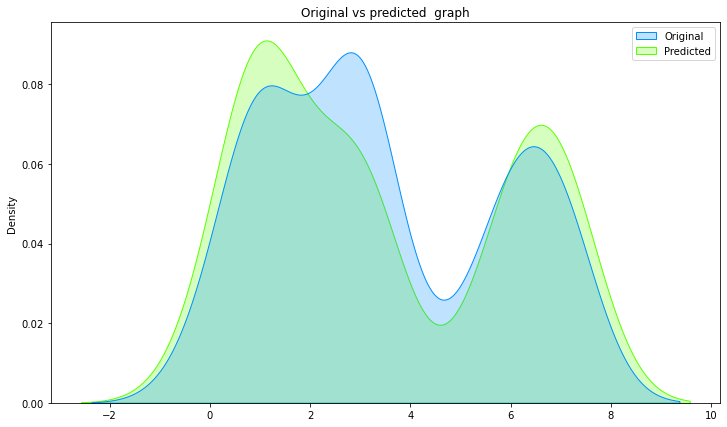

In [123]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

## Concluding Remarks for Classification Model(Primary Fuel Prediction)

* We predicted the Primary_Fuel outcomes of power plants by collecting the data of 907 power plants installed over different geographic location and sources over a span of 5 years.
* The prediction accuracies of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* By hyper parameter tuning, best parameters were applied on the best model and we could attain accuracy of 78.46% 
* The prediction results indicated that the best model achieved good prediction accuracy and has given quite accurate results

## (Approach 2: 'Regression Model to find "Capacity_mw")

## Data Preprocessing

## Seperating Input and Target variables

In [71]:
x1=df_pp.drop(columns='capacity_mw')
y1=df_pp['capacity_mw']

In [72]:
x1.shape

(834, 11)

In [73]:
y1.shape

(834,)

## Data Transformation to treat Skewness

### Checking Skewness

In [74]:
x1.skew()

latitude              -0.111185
longitude              0.911122
primary_fuel           0.412133
commissioning_year    -0.842130
source                 1.784584
geolocation_source    -2.104209
generation_gwh_2014    1.523244
generation_gwh_2015    1.388578
generation_gwh_2016    1.411295
generation_gwh_2017    1.278075
generation_gwh_2018    1.315105
dtype: float64

Obs- We can see except for column 'latitude', and 'primary_fuel' skewness is present in all the columns.

Applying transformation method to treat skewness

### Applying Transformation Method

In [75]:
x1=pd.DataFrame(x1)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['longitude', 'commissioning_year', 'source', 'geolocation_source','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017', 'generation_gwh_2018']
x1[skew_col]= pt.fit_transform(x1[skew_col].values)

In [76]:
x1.skew()

latitude              -0.111185
longitude             -0.000409
primary_fuel           0.412133
commissioning_year     0.027512
source                -0.179189
geolocation_source    -2.076068
generation_gwh_2014   -0.249970
generation_gwh_2015   -0.313081
generation_gwh_2016   -0.312658
generation_gwh_2017   -0.343453
generation_gwh_2018   -0.356856
dtype: float64

Obs-
* We can see skewness is removed from all, except 'geolocation_source' column.

* And as explained previously because of the problems after re-transformation, will be continuing with the current obtained results only

## Data Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1_scale=st.fit_transform(x1)
x1_scale=pd.DataFrame(x1_scale)

In [78]:
x1=pd.DataFrame(data=x1_scale)

## Checking Multi-Collinearity

In [79]:
def vif_cal():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    vif['Features']=x1.columns
    print(vif)

vif_cal()

    VIF Factor  Features
0     1.079126         0
1     1.320133         1
2     1.599302         2
3     1.109742         3
4     1.303098         4
5     1.714687         5
6     4.163131         6
7     7.983319         7
8    11.848242         8
9    11.491325         9
10   12.261168        10


Obs- 
* (Feature Denoted as: 0: 'latitude', 1:'longitude', 2:'primary_fuel', 3: 'commissioning_year' , 4:'source', 5:'geolocation_source', 6:'generation_gwh_2014', 7:'generation_gwh_2015', 8: 'generation_gwh_2016',9:'generation_gwh_2017',10: 'generation_gwh_2018')

* Keeping the acceptable range as below or equal 10, we observe the VIF of 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018' is high (we did see there correlation was also high)
* Deleting the column 'generation_gwh_2018' as it has max VIF

In [81]:
x1.drop(10, axis =1, inplace=True) # Dropping 'generation_gwh_2018' column

In [82]:
x1.shape

(834, 10)

In [83]:
# Rechecking the VIF
vif_cal()

   VIF Factor  Features
0    1.079116         0
1    1.319532         1
2    1.599145         2
3    1.108551         3
4    1.302353         4
5    1.714231         5
6    4.128235         6
7    7.966816         7
8   10.957949         8
9    5.542972         9


Obs- Again we can see VIF of column 8: 'generation_gwh_2016' is high, so dropping this column as well

In [84]:
x1.drop(8, axis =1, inplace=True) # Dropping 'generation_gwh_2016' column

In [85]:
x1.shape

(834, 9)

## Data Modelling(Regression Model)

In [ ]:
#Finding Best Random State

In [125]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.25, random_state =i)
    dtr = DecisionTreeRegressor()
    dtr.fit(x1_train, y1_train)
    pred1 = dtr.predict(x1_test)
    acc=r2_score(y1_test, pred1)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7573018880935075  on Random_state  67


## Splitting data into Train-Test

In [127]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=67)

In [128]:
x1_train.shape

(625, 9)

In [129]:
y1_train.shape

(625,)

In [130]:
x1_test.shape

(209, 9)

In [131]:
y1_test.shape

(209,)

## Using various Machine Learning Algorithms

### 1. Linear Regression

In [132]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)
lr.score(x1_train,y1_train)

0.42142134854645996

In [133]:
predlr=lr.predict(x1_test)
print("The performance metrix of Linear Regression is as below \n")
print("r2_score=",r2_score(y1_test,predlr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predlr))
print("Mean Squared Error:",mean_squared_error(y1_test,predlr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predlr)))

The performance metrix of Linear Regression is as below 

r2_score= 0.5005525331190885 

Mean Absolute Error: 231.8433105661788
Mean Squared Error: 102315.8109143008
Root Meand Squared Error: 319.86842750465513


### 2. Support Vector Regressor

In [134]:
svr=SVR()
svr.fit(x1_train,y1_train)
svr.score(x1_train,y1_train)

-0.20087056702041228

In [135]:
predsvr=svr.predict(x1_test)
print("The performance metrix of Support Vector Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predsvr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y1_test,predsvr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predsvr)))

The performance metrix of Support Vector Regressor is as below 

r2_score= -0.18274426029950086 

Mean Absolute Error: 244.6680893728654
Mean Squared Error: 242294.62780643717
Root Meand Squared Error: 492.2343220524521


### 3. Decision Tree Regressor

In [136]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
dtr.score(x1_train,y1_train)

0.9998638472371048

In [137]:
preddtr=dtr.predict(x1_test)
print("The performance metrix of Decision Tree Regressor is as below \n")
print("r2_score=",r2_score(y1_test,preddtr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y1_test,preddtr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,preddtr)))

The performance metrix of Decision Tree Regressor is as below 

r2_score= 0.7427772126770795 

Mean Absolute Error: 106.66272727272727
Mean Squared Error: 52694.14666359016
Root Meand Squared Error: 229.55205654402263


### 4. K Neighbors Regressor

In [138]:
knr=KNeighborsRegressor()
knr.fit(x1_train,y1_train)
knr.score(x1_train,y1_train)

0.7678129401912647

In [139]:
predknr=knr.predict(x1_test)
print("The performance metrix of K Neighbors Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predknr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predknr))
print("Mean Squared Error:",mean_squared_error(y1_test,predknr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predknr)))

The performance metrix of K Neighbors Regressor is as below 

r2_score= 0.7423643515163907 

Mean Absolute Error: 112.59862775119618
Mean Squared Error: 52778.72457668823
Root Meand Squared Error: 229.7362064992983


### 5.Random Forest Regressor

In [140]:
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1_train)
rfr.score(x1_train,y1_train)

0.9634943477484874

In [141]:
predrfr=rfr.predict(x1_test)
print("The performance metrix of Random Forest Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predrfr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y1_test,predrfr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predrfr)))

The performance metrix of Random Forest Regressor is as below 

r2_score= 0.832800765915715 

Mean Absolute Error: 87.48515405125958
Mean Squared Error: 34252.101279878276
Root Meand Squared Error: 185.0732322078973


### 6.Ada Boost Regressor

In [142]:
adr=AdaBoostRegressor()
adr.fit(x1_train,y1_train)
adr.score(x1_train,y1_train)

0.7493740714420312

In [143]:
predadr=adr.predict(x1_test)
print("The performance metrix of Ada Boost Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predadr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predadr))
print("Mean Squared Error:",mean_squared_error(y1_test,predadr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predadr)))

The performance metrix of Ada Boost Regressor is as below 

r2_score= 0.7393888077940927 

Mean Absolute Error: 174.35844742798753
Mean Squared Error: 53388.28852294099
Root Meand Squared Error: 231.05905851738638


### 7.Gradient Boosting Regressor

In [144]:
gbr=GradientBoostingRegressor()
gbr.fit(x1_train,y1_train)
gbr.score(x1_train,y1_train)

0.9412160933132229

In [145]:
predgbr=gbr.predict(x1_test)
print("The performance metrix of Gradient Boosting Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predgbr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predgbr))
print("Mean Squared Error:",mean_squared_error(y1_test,predgbr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predgbr)))

The performance metrix of Gradient Boosting Regressor is as below 

r2_score= 0.8108964567073328 

Mean Absolute Error: 98.15564833543021
Mean Squared Error: 38739.37433217627
Root Meand Squared Error: 196.82320577659604


### Regularization to overcome Over-Fitting (Lasso,Ridge)

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

#### 8. Lasso Regression

In [147]:
ls=Lasso(alpha=0.1)
ls.fit(x1_train,y1_train)
ls.score(x1_train,y1_train)

0.4214210139794212

In [148]:
predls=ls.predict(x1_test)
print("The performance metrix of Lasso Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predls),"\n")
print("Mean Absolute Error:",mean_absolute_error(y1_test,predls))
print("Mean Squared Error:",mean_squared_error(y1_test,predls))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predls)))

The performance metrix of Lasso Regressor is as below 

r2_score= 0.5004511930583594 

Mean Absolute Error: 231.8145719154678
Mean Squared Error: 102336.57123681554
Root Meand Squared Error: 319.90087720544864


#### 9. Ridge Regression

In [149]:
rg=Ridge(alpha=0.1)
rg.fit(x1_train,y1_train)
rg.score(x1_train,y1_train)

0.421421332720736

In [150]:
predrg=rg.predict(x1_test)
print("The performance metrix of Ridge Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predrg),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predrg))
print("Mean Squared Error:",mean_squared_error(y1_test,predrg))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predrg)))

The performance metrix of Ridge Regressor is as below 

r2_score= 0.5005269752231108 

Mean Absolute Error: 231.84620538785416
Mean Squared Error: 102321.04665384426
Root Meand Squared Error: 319.87661160804527


## Cross Validation

In [152]:
# Using of K-Fold cross-validation technique

preddtr= dtr.predict(x1_test)

from sklearn.model_selection import cross_val_score

test_accuracy= r2_score(y1_test,preddtr)

for j in range(4,11):
    cv_score=cross_val_score(dtr,x1,y1,cv=j)
    cv_mean= cv_score.mean()
    print('At cv:',j)
    print('Cross_Validation_score is:',cv_mean*100)
    print('Accuracy is :',test_accuracy*100)
    print("\n")

At cv: 4
Cross_Validation_score is: 60.23740712964943
Accuracy is : 74.27772126770795


At cv: 5
Cross_Validation_score is: 57.18199501678116
Accuracy is : 74.27772126770795


At cv: 6
Cross_Validation_score is: 53.98077675898837
Accuracy is : 74.27772126770795


At cv: 7
Cross_Validation_score is: 58.66051400998398
Accuracy is : 74.27772126770795


At cv: 8
Cross_Validation_score is: 59.67605834799537
Accuracy is : 74.27772126770795


At cv: 9
Cross_Validation_score is: 57.00123717104621
Accuracy is : 74.27772126770795


At cv: 10
Cross_Validation_score is: 47.30841489633225
Accuracy is : 74.27772126770795




Obs- Selecting the fold value as 4

In [153]:
from sklearn.model_selection import cross_val_score

# cv score for Linear Regression 
cvlr=cross_val_score(lr,x1,y1,cv=4).mean()
print('CV score  for Linear rgerssion:',cvlr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predlr)-cvlr)

CV score  for Linear rgerssion: 0.39386675797086435
And Difference between CV and r2_score = 0.1066857751482242


In [166]:
# cv score for Support Vector Regressor
cvsvr=cross_val_score(svr,x1,y1,cv=4).mean()
print('CV score  for Support Vector Regressor:',cvsvr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predsvr)-cvsvr)

CV score  for Support Vector Regressor: -0.19581805914597217
And Difference between CV and r2_score = 0.013073798846471307


In [167]:
# cv score for Decision Tree Regressor
cvdtr=cross_val_score(dtr,x1,y1,cv=4).mean()
print('CV score  for Decision Tree Regressor:',cvdtr)
print("And Difference between CV and r2_score =", r2_score(y1_test,preddtr)-cvdtr)

CV score  for Decision Tree Regressor: 0.6086325590773425
And Difference between CV and r2_score = 0.13414465359973704


In [168]:
# cv score for K Neighbors Regressor
cvknr=cross_val_score(knr,x1,y1,cv=4).mean()
print('CV score  for K Neighbors Regressor:',cvknr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predknr)-cvknr)

CV score  for K Neighbors Regressor: 0.6589618519969878
And Difference between CV and r2_score = 0.08340249951940293


In [169]:
# cv score for Random Forest Regressor
cvrfr=cross_val_score(rfr,x1,y1,cv=4).mean()
print('CV score  for Random Forest Regressor:',cvrfr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predrfr)-cvrfr)

CV score  for Random Forest Regressor: 0.7653234873182055
And Difference between CV and r2_score = 0.0674772785975094


In [170]:
# cv score for Ada Boost Regressor
cvadr=cross_val_score(adr,x1,y1,cv=4).mean()
print('CV score  for Ada Boost Regressor:',cvadr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predadr)-cvadr)

CV score  for Ada Boost Regressor: 0.6362027529481207
And Difference between CV and r2_score = 0.10318605484597199


In [171]:
# cv score for Gradient Boosting Regressor
cvgbr=cross_val_score(gbr,x1,y1,cv=4).mean()
print('CV score  for Gradient Boosting Regressor:',cvgbr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predgbr)-cvgbr)

CV score  for Gradient Boosting Regressor: 0.743364194094146
And Difference between CV and r2_score = 0.06753226261318679


In [172]:
# cv score for Lasso Regressor
cvls=cross_val_score(ls,x1,y1,cv=4).mean()
print('CV score  for Lasso Regressor:',cvls)
print("And Difference between CV and r2_score =", r2_score(y1_test,predls)-cvls)

CV score  for Lasso Regressor: 0.39419544246115
And Difference between CV and r2_score = 0.10625575059720938


In [173]:
# cv score for Ridge Regressor
cvrg=cross_val_score(rg,x1,y1,cv=4).mean()
print('CV score  for Ridge Regressor:',cvrg)
print("And Difference between CV and r2_score =", r2_score(y1_test,predrg)-cvrg)

CV score  for Ridge Regressor: 0.3939110133114627
And Difference between CV and r2_score = 0.10661596191164813


Obs- We can see the difference between r2_score and cv score is least in  Random Forest Regressor and Gradient Boosting regressor, so we will perform hyper tuning on both the algos and will select best from them then.


## Hyper Parameter Tuning

In [164]:
# 1. On Random Forest Regressor 
rfr.get_params() # Getting Random Forest Regressor Parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [165]:
#Selecting few parameter list to pass in Random Forest Regressor
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'max_features':['sqrt', 'log2', None], 
             'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
             'max_depth':[2,3,4],
             'n_estimators':[10,100,150,200]}

In [174]:
# Start Tuning 
rfr1=RandomForestRegressor()
GCV = GridSearchCV(rfr1,parameter,cv=4)

GCV.fit(x1_train,y1_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv

{'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 150}


In [182]:
#Applying best parameter values on Random Forest Regressor Algorithm 
capacity_best=RandomForestRegressor(criterion= 'friedman_mse', max_depth= 4, max_features= 'sqrt', n_estimators= 150)
capacity_best.fit(x1_train,y1_train)
capacity_best.score(x1_train,y1_train)

0.8164268149034826

In [184]:
predrfr1=capacity_best.predict(x1_test)
print("r2_score=",r2_score(y1_test,predrfr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predrfr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predrfr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predrfr1)))

r2_score= 0.801264969108025 

Mean Absolute Error: 112.48238862260872
Mean Squared Error: 40712.461652427264
Root Meand Squared Error: 201.77329271344922


In [194]:
# 2. On Gradient Boosting Regressor
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [196]:
#Selecting few parameter list to pass in Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
             'max_features':['sqrt', 'log2', 'auto'], 
             'criterion':['squared_error', 'friedman_mse'],
             'max_depth':[2,3,4],
             'n_estimators':[10,100,150,200]}

In [197]:
# Start Tuning 
gbr1=GradientBoostingRegressor()
GCV = GridSearchCV(gbr1,parameter,cv=4)

GCV.fit(x1_train,y1_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv

{'criterion': 'friedman_mse', 'loss': 'huber', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}


In [198]:
#Applying best parameter values on Gradient Boosting Regressor Algorithm 
capacity_best2=GradientBoostingRegressor(criterion= 'friedman_mse', loss= 'huber', max_depth=3, max_features='sqrt', n_estimators= 200)
capacity_best2.fit(x1_train,y1_train)
capacity_best2.score(x1_train,y1_train)

0.9189315253909156

In [199]:
predgbr1=capacity_best2.predict(x1_test)
print("r2_score=",r2_score(y1_test,predgbr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predgbr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predgbr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predgbr1)))

r2_score= 0.8120357172859436 

Mean Absolute Error: 92.35951390716698
Mean Squared Error: 38505.98768458506
Root Meand Squared Error: 196.22942614344328


Obs- Observing the final r2_scores of both the algos, we can say Gradient Boosting Regressor has given better score, so selecting that as best regressor model

## Saving the best Regressor model

In [202]:
import joblib

joblib.dump(capacity_best2,'capacity.obj')

['capacity.obj']

In [203]:
capacity_model=joblib.load('capacity.obj')

In [204]:
# Viewing Attributes of the best model
capacity_model

GradientBoostingRegressor(loss='huber', max_features='sqrt', n_estimators=200)

## Prediction

In [218]:
ori1 = np.array(y1_test)
predicted1 = np.array(capacity_model.predict(x1_test))
df_new1 = pd.DataFrame({"Original":ori1,"Predicted":predicted1},index= range(len(ori1)))
df_new1.sample(10)

,Original,Predicted
196,1340.00,1373.273860
43,33.00,37.345488
135,16.50,16.403391
56,890.00,1004.218042
202,50.40,30.110009
195,9.00,36.512558
131,28.00,84.863947
178,14.85,28.633784
143,3.00,4.738838
15,42.00,112.304974


Obs- We can see our best model has yielded fairly same results(if not exact)

Text(0.5, 1.0, 'Original vs predicted  graph')

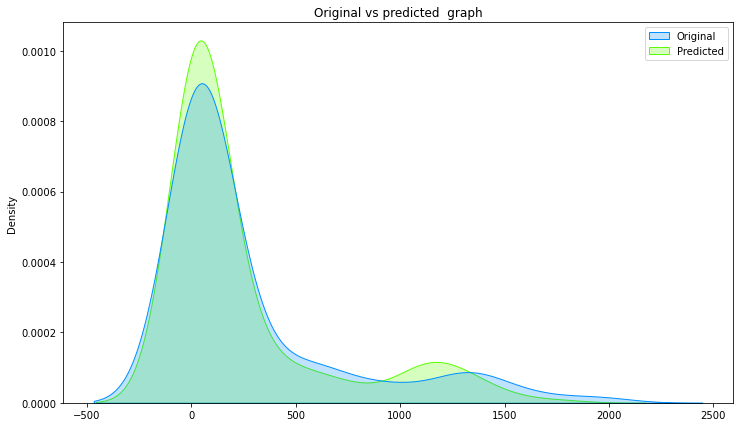

In [219]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new1, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

## Concluding Remarks for Regression Model(Capacity_mw Prediction)

* We predicted the Capacity_mw outcomes of power plants by collecting the data of 907 power plants installed over different geographic location and sources over a span of 5 years.
* The prediction scores of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* By hyper parameter tuning, best parameters were applied on both Random Forest Regressor and Gradient Boosting Regressor, and Gradient Boosting Regressor was selected as the best model and we could attain r2_score of 0.8120357172859436  
* The prediction results indicated that the best model achieved good prediction accuracy and has given quite accurate results